In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel(r'C:\Users\STUDENT.SYS12R137\Desktop\DA LAB III\SET 2\Air Quality Index_DA LAB III.xlsx',index_col='Date')

In [4]:
data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
Date,,,,,,,,,,,
2017-06-23,Thiruvananthapuram,15.08,31.09,1.94,5.80,4.65,NaN,0.71,4.65,17.54,47.0
2017-06-24,Thiruvananthapuram,11.15,22.15,1.87,6.07,4.69,NaN,0.60,4.12,16.65,44.0
2017-06-25,Thiruvananthapuram,12.25,23.53,1.88,5.22,4.29,NaN,0.56,3.83,18.70,38.0
2017-06-26,Thiruvananthapuram,10.06,22.58,1.98,4.74,4.13,NaN,0.47,3.73,19.53,37.0
2017-06-27,Thiruvananthapuram,13.03,21.61,1.90,6.64,5.03,NaN,0.64,4.00,14.46,46.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Thiruvananthapuram,18.06,36.04,8.19,9.50,12.46,6.57,0.61,8.38,29.89,42.0
2020-06-28,Thiruvananthapuram,22.51,43.97,7.00,7.38,9.57,6.09,0.61,8.32,27.73,43.0
2020-06-29,Thiruvananthapuram,23.17,46.71,8.87,10.75,12.88,5.65,0.68,8.07,25.61,49.0


In [5]:
data.shape

(1105, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1105 entries, 2017-06-23 to 2020-07-01
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    1105 non-null   object 
 1   PM2.5   1066 non-null   float64
 2   PM10    1070 non-null   float64
 3   NO      1077 non-null   float64
 4   NO2     1077 non-null   float64
 5   NOx     1092 non-null   float64
 6   NH3     999 non-null    float64
 7   CO      1092 non-null   float64
 8   SO2     1077 non-null   float64
 9   O3      1077 non-null   float64
 10  AQI     1052 non-null   float64
dtypes: float64(10), object(1)
memory usage: 103.6+ KB


In [7]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,1066.000000,1070.000000,1077.000000,1077.000000,1092.000000,999.000000,1092.000000,1077.000000,1077.000000,1052.000000
mean,28.045901,52.949953,3.461811,9.391291,8.194093,5.061902,0.952106,5.662182,34.743315,75.878327
std,17.843642,24.018704,3.658476,6.006485,6.458936,3.677780,0.531853,3.971979,17.997789,28.396178
min,2.000000,10.500000,0.480000,1.350000,0.000000,1.020000,0.000000,0.410000,2.620000,32.000000
25%,14.910000,34.270000,1.380000,4.980000,4.037500,2.470000,0.680000,3.440000,21.950000,57.000000
50%,22.350000,48.405000,2.050000,7.610000,6.455000,4.020000,0.895000,5.360000,33.480000,68.000000
75%,36.790000,67.185000,3.250000,12.090000,9.930000,6.355000,1.082500,6.680000,45.880000,89.000000
max,98.870000,178.240000,31.490000,30.540000,38.700000,26.580000,5.590000,35.330000,97.280000,230.000000


In [8]:
data.duplicated()

Date
2017-06-23    False
2017-06-24    False
2017-06-25    False
2017-06-26    False
2017-06-27    False
              ...  
2020-06-27    False
2020-06-28    False
2020-06-29    False
2020-06-30    False
2020-07-01    False
Length: 1105, dtype: bool

In [9]:
data.duplicated().sum()

9

In [10]:
data.isnull().sum()

City       0
PM2.5     39
PM10      35
NO        28
NO2       28
NOx       13
NH3      106
CO        13
SO2       28
O3        28
AQI       53
dtype: int64

There are many null values in this dataset. The column except 'City', all other columns have null values

In [11]:
data['PM2.5'].fillna(data['PM2.5'].mean(),inplace=True)
data['PM10'].fillna(data['PM10'].mean(),inplace=True)
data['NO'].fillna(data['NO'].median(),inplace=True)
data['NO2'].fillna(data['NO2'].mean(),inplace=True)
data['NOx'].fillna(data['NOx'].mean(),inplace=True)
data['NH3'].fillna(data['NH3'].mean(),inplace=True)
data['CO'].fillna(data['CO'].median(),inplace=True)
data['SO2'].fillna(data['SO2'].mean(),inplace=True)
data['O3'].fillna(data['O3'].median(),inplace=True)

In [12]:
data['AQI'].fillna(data['AQI'].median(),inplace=True)

All cloumns are filled with its statistical measurements

In [13]:
data.isnull().sum()

City     0
PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

After filling add columns, now there is no null values in the columns.

In [14]:
df=pd.DataFrame()
df['AQI']=data['AQI']

In [15]:
df

,AQI
Date,
2017-06-23,47.0
2017-06-24,44.0
2017-06-25,38.0
2017-06-26,37.0
2017-06-27,46.0
...,...
2020-06-27,42.0
2020-06-28,43.0
2020-06-29,49.0


In [16]:
#pip install tenserflow

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
adf=adfuller(df['AQI'])
print('AD-Fuller test values: \n')
print('p-value :',adf[1])
print('Test stastic:',adf[0])

AD-Fuller test values: 

p-value : 0.02948871824810683
Test stastic: -3.0620922012247624


#### Here the p-value is less than 0.05 and the test statistic value is a negative value. So the 'AQI' column is stationary

In [19]:
train=df[:884]

In [20]:
test=df[884:]

In [21]:
scaler=MinMaxScaler()

In [22]:
scaler_train=scaler.fit_transform(train)

In [23]:
scaler_test=scaler.transform(test)

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential

In [37]:
n_input=12
n_feature=1
generator=TimeseriesGenerator(scaler_train,scaler_train,n_input,batch_size=1)

In [42]:
from tensorflow.keras.layers import LSTM,Dense

model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1),return_sequences=True))
model.add(LSTM(25,activation='softmax'))
model.add(Dense(1))

In [43]:
model.compile(loss='mse',optimizer='adam')

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 25)                12600     
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 53,426
Trainable params: 53,426
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(generator,epochs=20)

Epoch 1/20
872/872 [==============================] - 5s 4ms/step - loss: 0.0169
Epoch 2/20
872/872 [==============================] - 4s 5ms/step - loss: 0.0129
Epoch 3/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0124
Epoch 4/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0123
Epoch 5/20
872/872 [==============================] - 3s 4ms/step - loss: 0.0119
Epoch 6/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0118
Epoch 7/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0113
Epoch 8/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0109
Epoch 9/20
872/872 [==============================] - 4s 5ms/step - loss: 0.0105
Epoch 10/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0101
Epoch 11/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0101
Epoch 12/20
872/872 [==============================] - 4s 4ms/step - loss: 0.0091
Epoch 13/20
872/872 [====

In [50]:
prediction=[]
batch_1=scaler_train[-12:]
batch=batch_1.reshape(1,n_input,1)
for i in range(len(test)):
    pred=model.predict(batch)[0]
    prediction.append(pred)
    batch=np.append(batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [51]:
prediction

[array([0.25512213], dtype=float32),
 array([0.24847457], dtype=float32),
 array([0.24067283], dtype=float32),
 array([0.23214842], dtype=float32),
 array([0.2265164], dtype=float32),
 array([0.2204779], dtype=float32),
 array([0.21856093], dtype=float32),
 array([0.2181179], dtype=float32),
 array([0.2182616], dtype=float32),
 array([0.21801433], dtype=float32),
 array([0.21836191], dtype=float32),
 array([0.2180591], dtype=float32),
 array([0.21635634], dtype=float32),
 array([0.21430704], dtype=float32),
 array([0.21206872], dtype=float32),
 array([0.20982943], dtype=float32),
 array([0.20772791], dtype=float32),
 array([0.20576768], dtype=float32),
 array([0.20395821], dtype=float32),
 array([0.2022286], dtype=float32),
 array([0.20051461], dtype=float32),
 array([0.19877172], dtype=float32),
 array([0.19698952], dtype=float32),
 array([0.19515398], dtype=float32),
 array([0.19326475], dtype=float32),
 array([0.19134703], dtype=float32),
 array([0.18941435], dtype=float32),
 array(

In [54]:
actual_prediction=scaler.inverse_transform(prediction)

In [55]:
actual_prediction

array([[85.49369228],
       [84.20406622],
       [82.69052839],
       [81.03679422],
       [79.94418079],
       [78.77271143],
       [78.40082121],
       [78.31487119],
       [78.34275031],
       [78.29477996],
       [78.36221135],
       [78.303464  ],
       [77.97312939],
       [77.57556576],
       [77.141332  ],
       [76.70691034],
       [76.29921436],
       [75.91892919],
       [75.56789339],
       [75.23234951],
       [74.89983523],
       [74.56171274],
       [74.21596715],
       [73.8598724 ],
       [73.49336201],
       [73.12132436],
       [72.74638432],
       [72.37091815],
       [71.99539995],
       [71.62034139],
       [71.24571645],
       [70.87079376],
       [70.49493444],
       [70.1182628 ],
       [69.74234566],
       [69.36869493],
       [68.99893814],
       [68.63585338],
       [68.28039172],
       [67.93447846],
       [67.59776959],
       [67.27126244],
       [66.95664525],
       [66.65352488],
       [66.36117861],
       [66

In [56]:
test['prediction']=actual_prediction

C:\Users\STUDEN~1.SYS\AppData\Local\Temp/ipykernel_16560/2485512972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=actual_prediction


<AxesSubplot:xlabel='Date'>

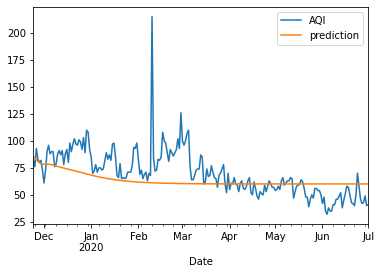

In [58]:
test.plot()